In [4]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from simulation import run_interferom_simulation, dist_to_state

from numeric_truncated_unitaries import numeric_truncated_unitary
from direct_decomposition import direct_decomposition, compile_unitary
from random import random
from qiskit.quantum_info import Operator

In [5]:
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), np.conjugate(np.transpose(m)) @ m)

# Useful diagnostics, don't delete

# R = random_unitary(3)
# assert(is_unitary(R))
# I = itf.square_decomposition(R)
# T = I.calculate_transformation()

# print(R)
# print("\n")
# assert(is_unitary(R))
# assert(np.allclose(R,T))

[
 Beam splitter between modes 1 and 2: 
 Theta angle: 0.52 
 Phase: 1.21, 
 Beam splitter between modes 2 and 3: 
 Theta angle: 1.01 
 Phase: 1.40]


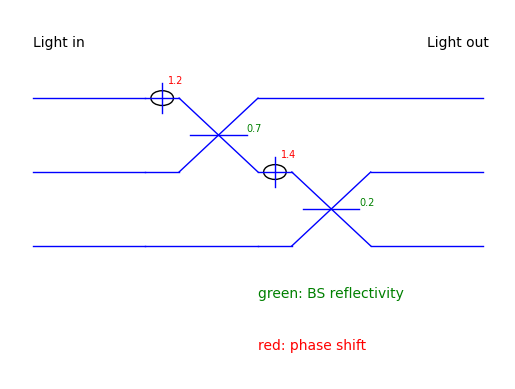

In [6]:
"""
Some notes:
    theta = 0 -> reflective.
    theta = pi/2 -> transparent
    R = 0 -> transparent
    R = 1 -> reflective
"""

I = itf.Interferometer()

theta_1 = np.pi/2 * random()
phi_1 = np.pi * random()
theta_2 = np.pi/2 * random()
phi_2 = np.pi * random()

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)
BS2 = itf.Beamsplitter(2, 3, theta=theta_2, phi=phi_2)

I.add_BS(BS1)
I.add_BS(BS2)

print(I.BS_list)
I.draw()

In [7]:
R=I.calculate_transformation()
print(R)
is_unitary(R)

[[ 0.30489832+0.81460383j -0.49341424+0.j          0.        +0.j        ]
 [-0.22661254+0.1315563j   0.07716131+0.45542006j -0.84733606+0.j        ]
 [-0.36157504+0.20990664j  0.12311588+0.72665231j  0.53105706+0.j        ]]


True

In [8]:
initial_dist = [1,0,0]
possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    assert(is_unitary(R))
    # prob = output_probability([1,0,0], dist, R)
    # This is what was going wrong I was putting in incorrect arguments
    # I was iterating over output distributions, not input distributions!
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'100': 0.7565423882882972, '010': 0.06866030554961014, '001': 0.17479730616209266}


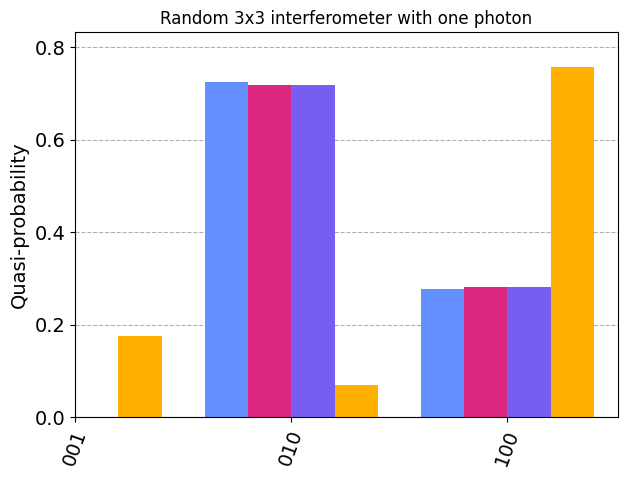

In [9]:
probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], 
               title='Random 3x3 interferometer with one photon', bar_labels=False)

In [10]:
# def custom_calculate_transformation():

#     def Beamsplitter(theta, phi):
#         return np.matrix(
#             [[np.exp(1j*phi) * np.cos(theta), -np.sin(theta)], 
#              [np.exp(1j*phi) * np.sin(theta), np.cos(theta)]]
#              )

#     I2 = np.eye(2,2)
#     BSM1 = Beamsplitter(BS1.theta, BS1.phi) 
#     BSM2 = Beamsplitter(BS2.theta, BS2.phi)

#     padded_BSM1 = np.pad(BSM1, ((0,1),(0,1)), 'constant', constant_values=0)
#     padded_BSM2 = np.pad(BSM2, ((1,0),(1,0)), 'constant', constant_values=0)
#     padded_BSM1[2,2] = 1
#     padded_BSM2[0,0] = 1
#     return padded_BSM1 @ padded_BSM2 

# R = custom_calculate_transformation()

## 2 photon experiment

In [11]:
initial_dist = [2,0,0]
possible_dists = [[2,0,0], [0,2,0], [0,0,2], [1,1,0], [1,0,1], [0,1,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    assert(is_unitary(R))
    # prob = output_probability([1,0,0], dist, R)
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'100000': 0.5723563852769606, '001000': 0.004714237558165825, '000010': 0.030554098241524354, '010100': 0.10388886308221255, '010001': 0.2644831429404605, '000101': 0.024003272900676068}


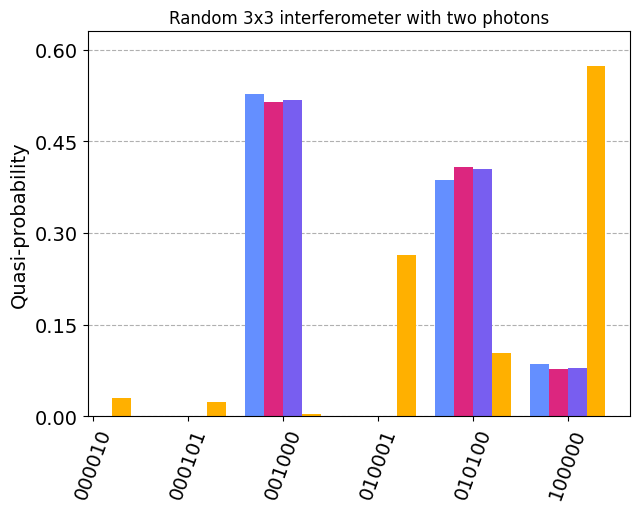

In [12]:
probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], 
               title='Random 3x3 interferometer with two photons', bar_labels=False)

# Reverse two knit test

[
 Beam splitter between modes 2 and 3: 
 Theta angle: 1.34 
 Phase: 2.78, 
 Beam splitter between modes 1 and 2: 
 Theta angle: 0.64 
 Phase: 2.38]


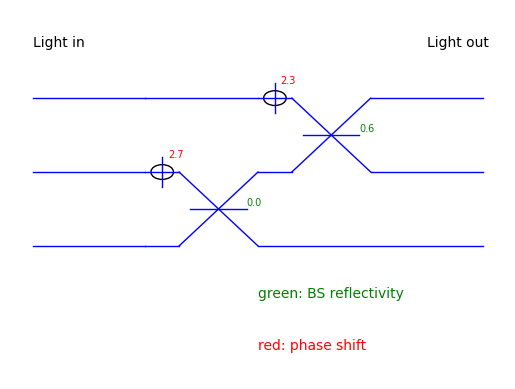

In [13]:
I = itf.Interferometer()

theta_1 = np.pi/2 * random()
phi_1 = np.pi * random()
theta_2 = np.pi/2 * random()
phi_2 = np.pi * random()

BS1 = itf.Beamsplitter(2, 3, theta=theta_1, phi=phi_1)
BS2 = itf.Beamsplitter(1, 2, theta=theta_2, phi=phi_2)

I.add_BS(BS1)
I.add_BS(BS2)

print(I.BS_list)
I.draw()

In [14]:
R=I.calculate_transformation()
print(R)
is_unitary(R)

initial_dist = [1,0,0]
possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    assert(is_unitary(R))
    # prob = output_probability([1,0,0], dist, R)
    # This is what was going wrong I was putting in incorrect arguments
    # I was iterating over output distributions, not input distributions!
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

[[-0.58061477+0.55265966j  0.12630563-0.04799365j  0.58240647+0.j        ]
 [-0.43305779+0.41220717j -0.1693421 +0.06434666j -0.78085144+0.j        ]
 [ 0.        +0.j         -0.91060526+0.34601203j  0.22599501+0.j        ]]
{'100': 0.6425462046842064, '010': 0.3574537953157934, '001': 0.0}


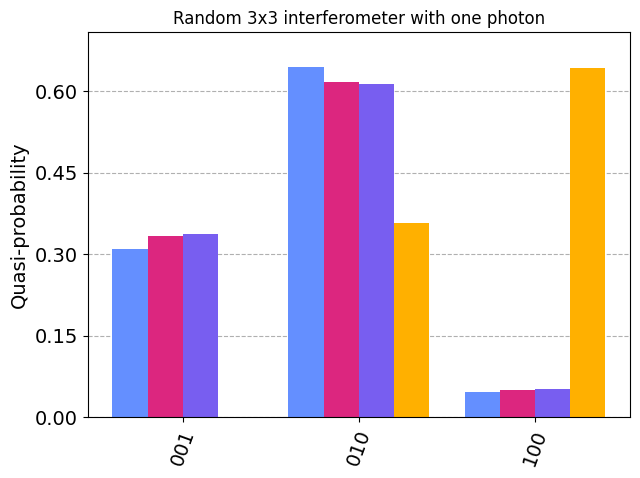

In [15]:
probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], 
               title='Random 3x3 interferometer with one photon', bar_labels=False)